In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.spectral_norm import SpectralNorm
from torchvision import datasets

from abc import ABC, abstractmethod
from networks.discriminator import NLayerDiscriminator
from networks.generator import ResNetGenerator

In [18]:
def conv(in_planes, out_planes, kernel_size=3, stride=1, groups=1, dilation=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=kernel_size, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)

class ResidualBlock(nn.Module):
    def __init__(self, in_channel, out_channel):

        super(ResidualBlock, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(in_channel, out_channel, kernel_size=3, stride=1, padding=1, bias=False),
            nn.InstanceNorm2d(out_channel, affine=True),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channel, out_channel, kernel_size=3, stride=1, padding=1, bias=False),
            nn.InstanceNorm2d(out_channel, affine=True))

    def forward(self, x):
        return x + self.main(x)
    
    
layers.append(nn.Conv2d(in_channel, in_channel*2, kernel_size=3, stride=2, padding=1, bias=False))
layers.append(nn.InstanceNorm2d(in_channel*2, affine=True))
layers.append(nn.ReLU(inplace=True))
    
class ResidualBottleNeckBlock(nn.Module):
    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):

        super(ResidualBlock, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        self.conv1 = conv(inplanes, planes, stride, kernel_size=1)
        self.bn1 = norm_layer(planes)
        self.conv2 = conv(planes, planes)
        self.bn2 = norm_layer(planes)
        self.conv3 = conv(inplanes, planes, stride, kernel_size=1)
        self.bn3 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out 
 

class ResNet_encoder(nn.Module):

    def __init__(self, block, self, conv_dim=64, c_dim=5, repeat_num=9, k_size=4, n_down=2):
        
        super(ResNet_encoder, self).__init__()
        self.name = 'resnet_encoder'
        
        layers = []
        layers.append(nn.Conv2d(c_dim, conv_dim, kernel_size=3, stride=1, padding=3, bies=False))
        layers.append(nn.Conv2d(c_dim, conv_dim, kernel_size=3, stride=1, padding=3, bies=False))
        layers.append(nn.InstanceNorm2d(conv_dim, affine=True))
        layers.append(nn.ReLU(inplace=True))
    
    def _make_layer(self, block, in_channel, blocks, stride=1, dilate=False):
        layers = []
        for _ in range(1, blocks):
            layers.appned(block(in_channel, kernel_size=3, stride=stride, padding=1, bias=False))
            in_channel *= 2
            
            

class ResNet_decoder(nn.Module):

    def __init__():
        super(ResNet_decoder, self).__init__()
    
class ResNet(nn.Module):
    
    def __init__():
        super(ResNet, self).__init__()

In [7]:
torch.tensor([[1,2], [3,4]]).T

tensor([[1, 3],
        [2, 4]])

In [ ]:
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError("replace_stride_with_dilation should be None "
                             "or a 3-element tuple, got {}".format(replace_stride_with_dilation))
        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2,
                                       dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                                       dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2,
                                       dilate=replace_stride_with_dilation[2])

    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups,
                            self.base_width, previous_dilation, norm_layer))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups,
                                base_width=self.base_width, dilation=self.dilation,
                                norm_layer=norm_layer))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

In [1]:
from utils.utils import *
import matplotlib.pyplot as plt

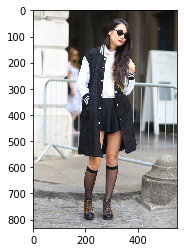

In [2]:
img = read_image('0001.jpg')
plt.imshow(img)

In [7]:
mask = read_mask('0001.mat')
# mask_dic = loadmat(f'{MASKPATH}/{name}')

In [11]:
# mask.unique()
np.unique(mask)

array([ 0,  5, 19, 39, 41, 42, 45, 47, 55], dtype=uint8)

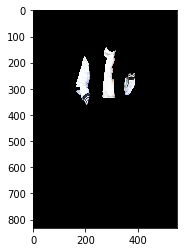

In [20]:
img_ = np.array(img)
a = cut_mask(img_, mask, 5)
plt.imshow(a)